##### USED CAR PRICE PREDICTION
### 1.0 Data Understanding

#### Background
This analysis aims at predicting the features that affect used car prices. The data used was from kaggle (https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction/discussion/358691) . The predictor variables in the data are Name, Location, Year, Kilometers Driven,	Fuel Type, Transmission, Owner Type, Mileage, Engine, Power, Seats		and Price

#### Problem Statement

There is an increasingly high demand for used cars due to their relatively lower prices as compared to new cars.
It has also been noted that there is increasing concern for different features of the used car by the clients and this analysis aims at helping them know the factors to consider when buying the used cars

#### Objectives
Research questions;

1. What is the relationship between car price and other predictor variables?
2. Which combination of features provide the best accurate prediction of car prices?

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_string_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import re
import warnings
%matplotlib inline

In [2]:
used_cars=pd.read_csv(r"C:\Users\user\Desktop\car_price_prediction\Used_cars_Price_Prediction\tr_data.csv")
used_cars.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
#Removing the double indexing by removing "Unnamed: 0" column and "New_Price" as we have another detailed price column
used_cars.drop(columns=["Unnamed: 0", "New_Price"], inplace=True)

used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### 2.0 Data Pre-Processing

In [4]:
## The Price is in lakh rupee. Lakh is an indian numbering system which equals to 100,000
## For example 1.75 lakh rupee == 175,000 INR
## Therefore I will convert lakh rupees to Indian rupee and finally to the Kenyan shilling for easier understanding
## 1 INR == 1.82 Ksh (As at 8th Nov 2023)
## Therefore I will multiply that column by 182,000

used_cars["Price"] = (used_cars["Price"] * 182000).astype(int)

used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,318500
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,2275000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,819000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,1092000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,3228679


In [5]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 540.9+ KB


In [6]:
# Checking the no of rows and columns Iam working with
used_cars.shape

(6019, 12)

In [7]:
# Checking for missing values
used_cars.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Null values:

Mileage               2
Engine               36
Power                36
Seats                42




In [8]:


#Seats, Engine and Power are discrete variables and can only take specific values. Therefore; for this three Columns,
#I will fill the null values with the mode

#  For Mileage since it is a continuos variable, it will be appropriate to replace the missing values with the mean

used_cars["Mileage"].fillna(used_cars["Mileage"].mean, inplace=True)
used_cars["Engine"].fillna(used_cars["Engine"].mode()[0], inplace=True)
used_cars["Power"].fillna(used_cars["Power"].mode()[0], inplace= True)
used_cars["Seats"].fillna(used_cars["Seats"].mode()[0], inplace=True)

In [9]:
used_cars.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
# Its now clear we dont have null values, I will now proceed to check for duplicate values

used_cars.duplicated().value_counts()

False    6019
dtype: int64

In [11]:
# its clear there are no duplicated values

In [12]:
## finding the descriptive statistics of the factors that affect used car prices

used_cars.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6.019000e+03
mean,2013.358199,5.873838e+04,5.276790,1.725263e+06
std,3.269742,9.126884e+04,0.806346,2.036201e+06
min,1998.000000,1.710000e+02,0.000000,8.008000e+04
25%,2011.000000,3.400000e+04,5.000000,6.370000e+05
50%,2014.000000,5.300000e+04,5.000000,1.026480e+06
75%,2016.000000,7.300000e+04,5.000000,1.810899e+06
max,2019.000000,6.500000e+06,10.000000,2.912000e+07


### 3.0 Exploratory Data Analysis

#### 3.1 Univariate Analysis

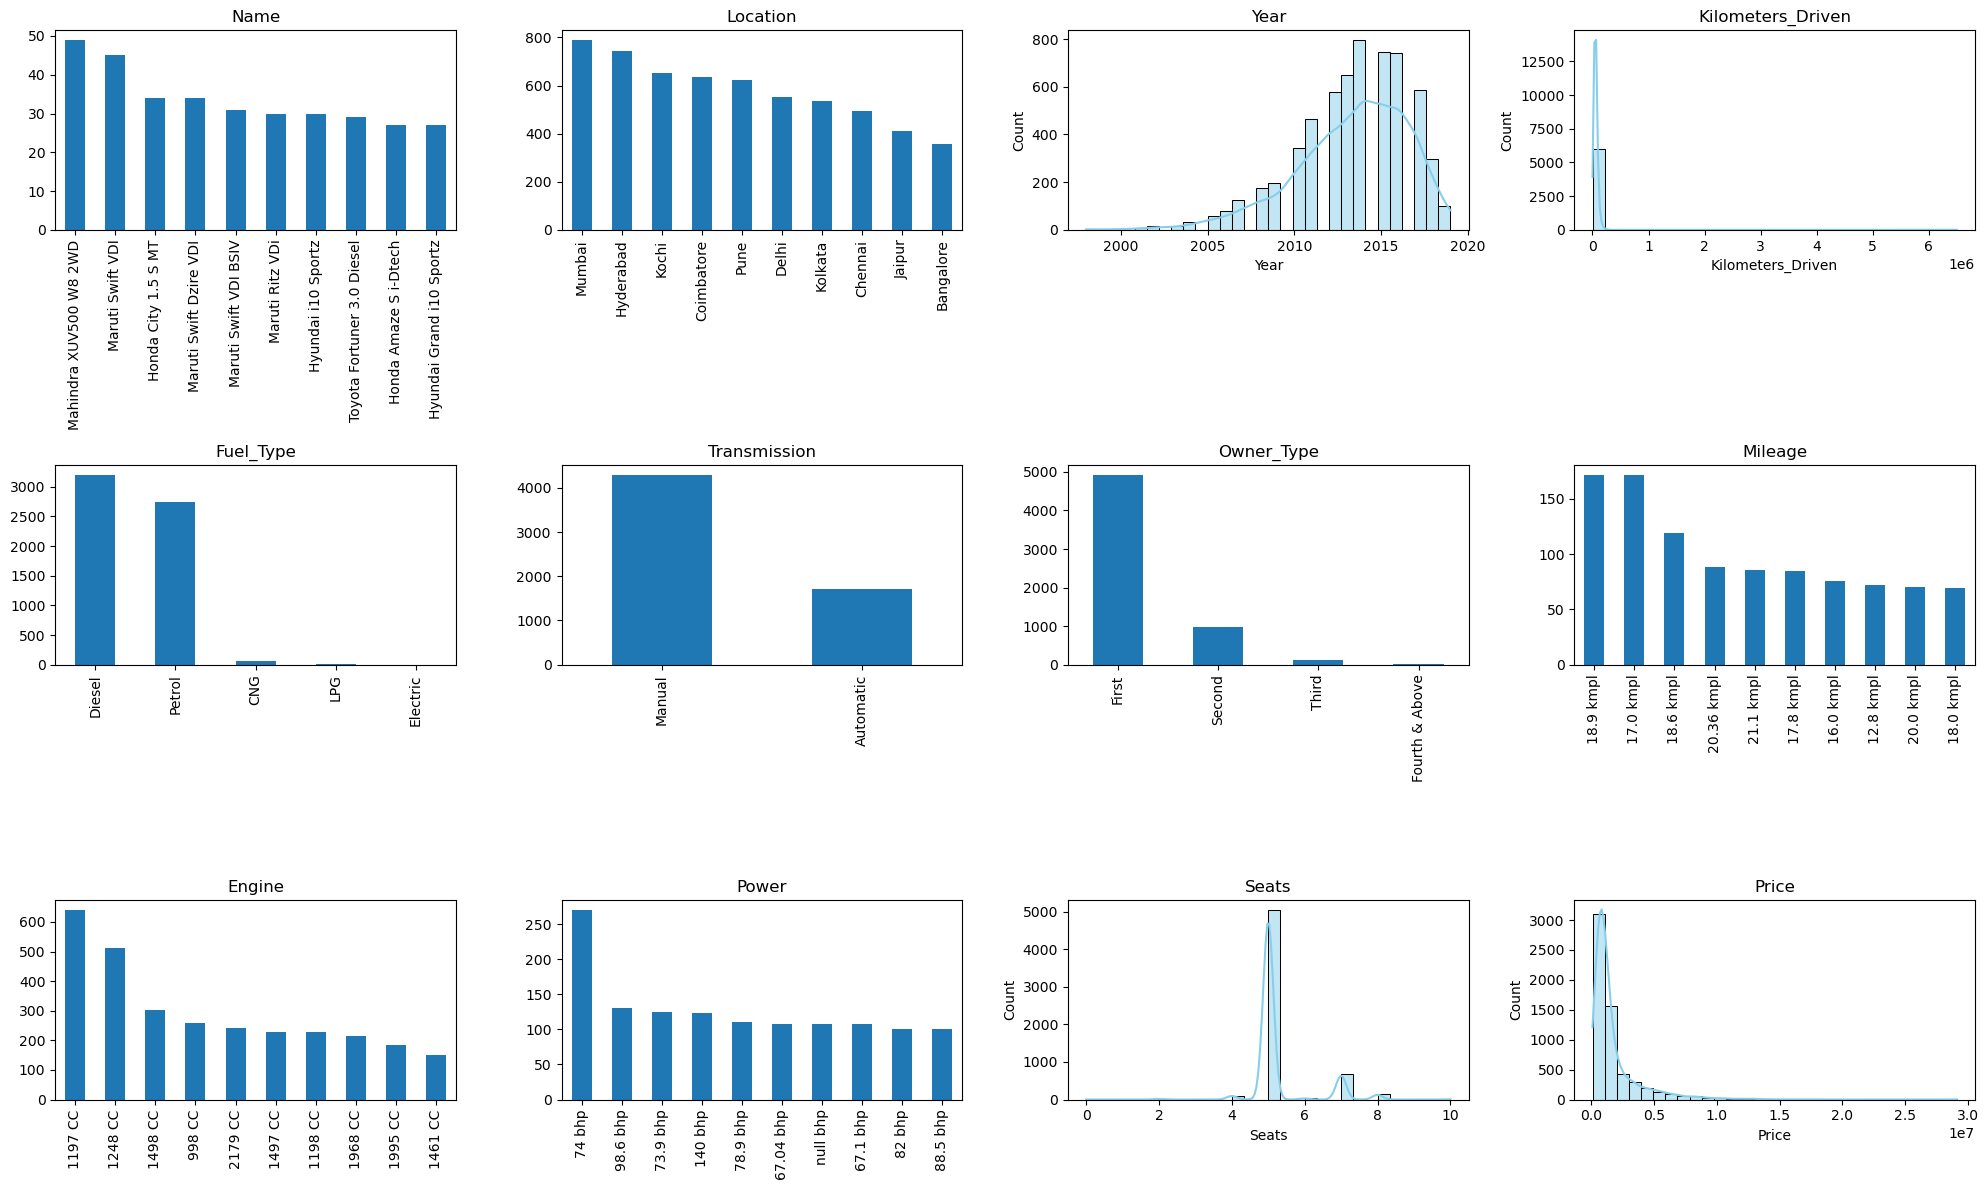

In [13]:


# columns to plot
columns_to_plot = used_cars.columns

# Calculating the number of rows and columns for the subplots
num_rows = len(columns_to_plot) // 4 + (len(columns_to_plot) % 4 > 0)
num_cols = min(len(columns_to_plot), 4)

# Creating the figure and axes objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flattening the axes array if it's a single row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)

# Iterating over the columns and plot on each subplot
for i, column in enumerate(columns_to_plot):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]

    ax.set_title(column)

    if is_numeric_dtype(used_cars[column]):
        sns.histplot(used_cars[column], kde=True, bins=30, color='skyblue', ax=ax)
    elif is_string_dtype(used_cars[column]):
        used_cars[column].value_counts()[:10].plot(kind='bar', ax=ax)

# Adjusting the spacing between subplots
plt.tight_layout()
plt.show()


